In [1]:
import tensorflow as tf

2024-01-25 02:01:46.015978: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-25 02:01:46.043109: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-25 02:01:46.043527: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-25 02:01:46.617525: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 dropout (Dropout)           (None, 147, 147, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        1

2024-01-25 02:01:47.346761: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-25 02:01:47.347122: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-25 02:01:47.348671: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the 

In [3]:
from tensorflow.keras.optimizers import RMSprop

loss_function = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(loss=loss_function,
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        'ECG_dataset/train/',  
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        'ECG_dataset/test/',
        target_size=(300, 300),
        batch_size=32,
        class_mode='binary')

Found 97777 images belonging to 7 classes.
Found 24954 images belonging to 7 classes.


In [5]:
validation_generator.image_shape

(300, 300, 3)

In [7]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/10
8/8 [==============================] - 18s 2s/step - loss: 0.9594 - accuracy: 0.7461 - val_loss: 1.0986 - val_accuracy: 0.7109
Epoch 2/10
8/8 [==============================] - 18s 2s/step - loss: 0.9692 - accuracy: 0.7510 - val_loss: 1.0051 - val_accuracy: 0.7617
Epoch 3/10
8/8 [==============================] - 18s 2s/step - loss: 0.9217 - accuracy: 0.7510 - val_loss: 1.0466 - val_accuracy: 0.7227
Epoch 4/10
8/8 [==============================] - 18s 2s/step - loss: 0.9573 - accuracy: 0.7520 - val_loss: 1.0974 - val_accuracy: 0.6914
Epoch 5/10
8/8 [==============================] - 18s 2s/step - loss: 0.9562 - accuracy: 0.7500 - val_loss: 1.0895 - val_accuracy: 0.6992
Epoch 6/10
8/8 [==============================] - 18s 2s/step - loss: 1.0258 - accuracy: 0.7207 - val_loss: 1.0403 - val_accuracy: 0.7031
Epoch 7/10
8/8 [==============================] - 18s 2s/step - loss: 0.9092 - accuracy: 0.7598 - val_loss: 0.9856 - val_accuracy: 0.7500
Epoch 8/10
8/8 [==================

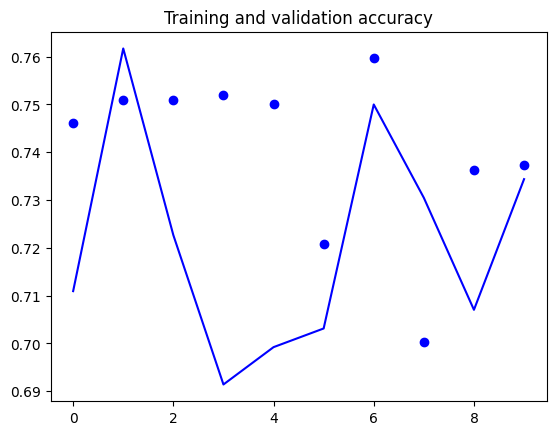

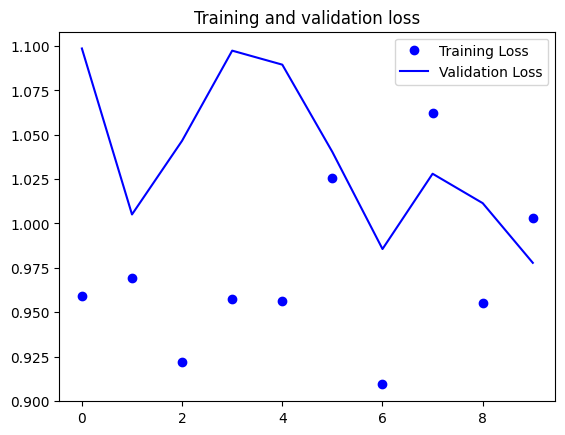

In [9]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save("hh.h5")

In [16]:
import os
def export_tf_serving( model_dir='export_tf/ecg/cnn', version=1):
        export_path = os.path.join(model_dir, str(version))
        tf.keras.models.save_model(
                model, 
                export_path, 
                overwrite=True, 
                include_optimizer=True, 
                save_format=None, 
                signatures=None, 
                options=None)
export_tf_serving()

INFO:tensorflow:Assets written to: export_tf/ecg/cnn/1/assets


INFO:tensorflow:Assets written to: export_tf/ecg/cnn/1/assets
